Probe Lenght is   [40.]
Probe Type  is   ['FCT']
lr_Train r^2 is   0.9960542689227841
lr_Train real RMSE is  : 0.009177559743172513
lr_eval r^2 is   0.9691170320051029
lr_eval RMSE is  : 0.04852430408861788
lr_final  r^2 is   0.9934232806736892
lr_Final RMSE is  : 0.014269757590987244
intercept -0.5022252118053934
wieghts coe wi Ka       -0.000657
v0        0.000044
v3        0.000014
vf        0.000081
vr        0.000067
sf       -0.000190
ECtopp    1.171640
dtype: float64


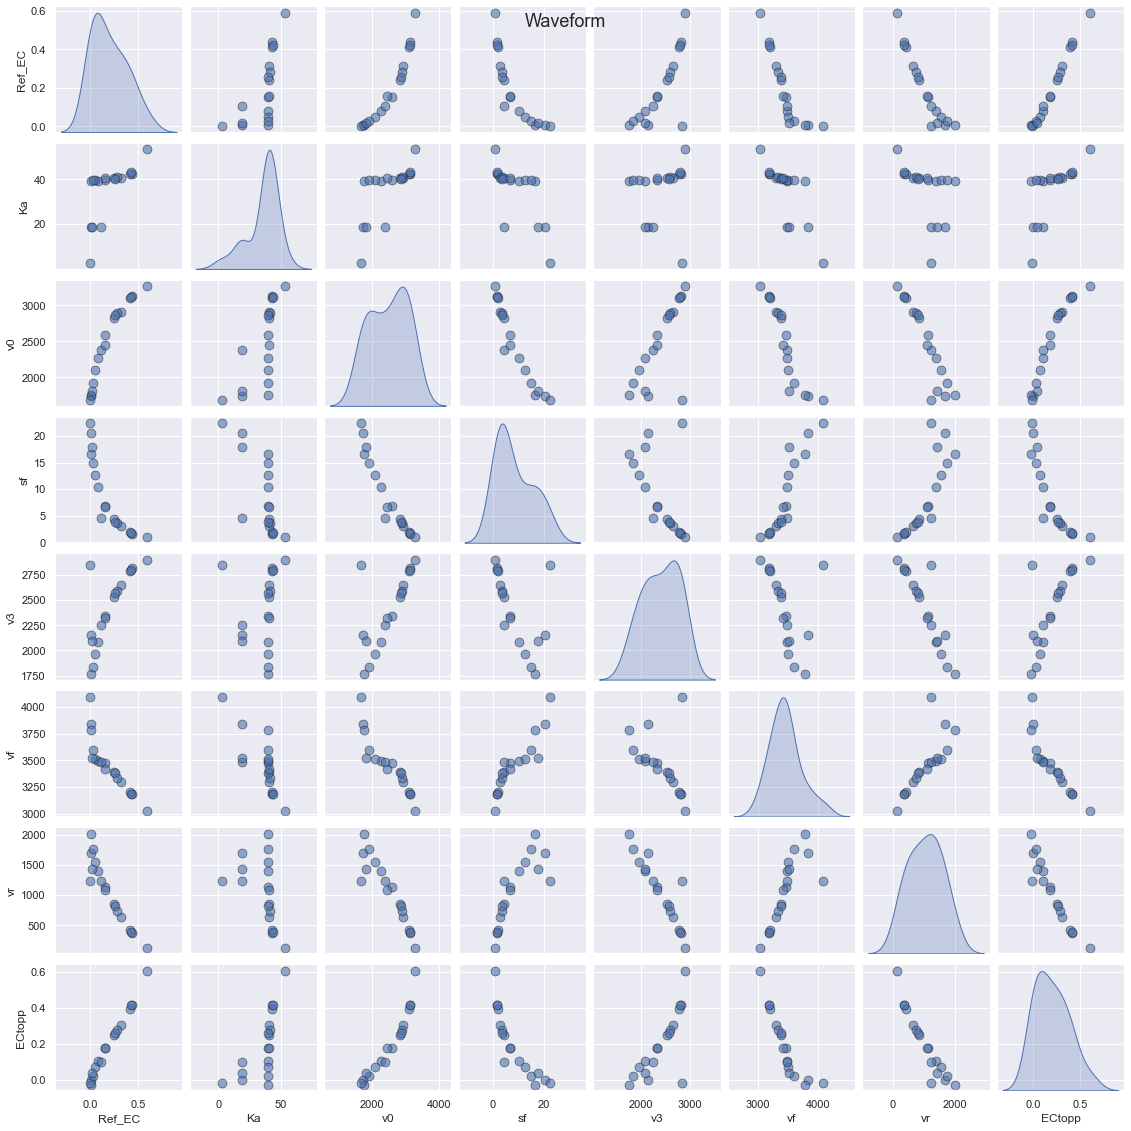

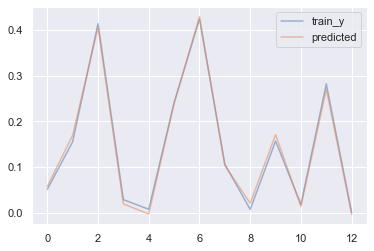

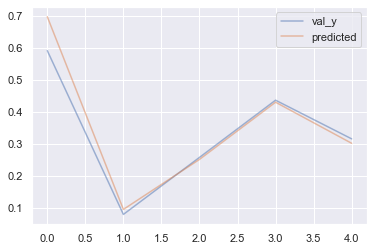

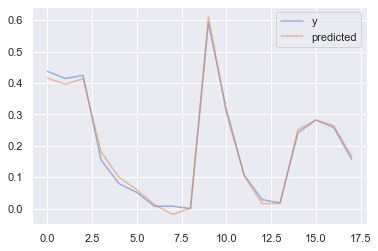

In [1]:
#Enter Probe tine lenght and type
tine_lenght = 40
probe_type = 'FCT'



import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

mod_data = pd.read_csv('model_input.csv')

#clean up data

mod_data.drop('sol_number', axis=1, inplace=True)
mod_data.drop('Date', axis=1, inplace=True)
mod_data.drop('Ka_trace', axis=1, inplace=True)
mod_data.drop('Zero_Time', axis=1, inplace=True)
mod_data.drop('t_s', axis=1, inplace=True)
mod_data.drop('t_f', axis=1, inplace=True)
mod_data.drop('Volumetric', axis=1, inplace=True)
mod_data.drop('int_time', axis=1, inplace=True)
mod_data.drop('v1a', axis=1, inplace=True)
mod_data.drop('v1', axis=1, inplace=True)
mod_data.drop('t_dif', axis=1, inplace=True)
mod_data.drop('Probee_index', axis=1, inplace=True)


mod_dfa = mod_data.loc[(mod_data['Probe_L']== tine_lenght) & (mod_data['Probe_type']== probe_type)]  
mod_dfa.reset_index(drop = True, inplace = True)
mod_dfb = mod_dfa.copy()

#mod_dfb.drop(index=9, inplace = True)
#mod_dfb.reset_index(drop=True, inplace=True)



print("Probe Lenght is  ", mod_dfb.Probe_L.unique())
print("Probe Type  is  ", mod_dfb.Probe_type.unique())



#make Pairplot
sns.pairplot(mod_dfb, 
             vars = ['Ref_EC','Ka', 'v0', 'sf', 'v3', 'vf', 'vr','ECtopp'], 
             #hue = 'L', change color based on a class
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 2);
# Title 
plt.suptitle('Waveform', 
             size = 18);



#prepair data for Model
column_names = ['Ka','v0', 'v3', 'vf', 'vr', 'sf', 'ECtopp']
X = mod_dfb[column_names]
y = mod_dfb['Ref_EC']


# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 5, random_state=2)



#LinearRegression

#model Training set
lr_model_train = LinearRegression(fit_intercept=True)
lr_model_train.fit(train_X, train_y)
lr_train_predict = lr_model_train.predict(train_X)
lr_train_df = pd.DataFrame()
lr_train_df['train_y'] = train_y
lr_train_df['predicted'] = lr_train_predict
lr_train_df.reset_index(drop=True, inplace=True)
lr_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("lr_Train r^2 is  ",(lr_train_df['train_y'].corr(lr_train_df['predicted']))**2)
print("lr_Train real RMSE is  :",((lr_train_df['predicted'] - lr_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate error
#lr_model_eval = LinearRegression(fit_intercept=True)
#lr_model_eval.fit(train_X, train_y)
lr_eval_predict = lr_model_train.predict(val_X)
#lr_eval_mae = mean_absolute_error(lr_eval_predict, val_y)

#print("Test MAE is ", lr_eval_mae)

lr_eval_df = pd.DataFrame()
lr_eval_df['val_y'] = val_y
lr_eval_df['predicted'] = lr_eval_predict
lr_eval_df.reset_index(drop=True, inplace=True)
lr_eval_df[['val_y', 'predicted']].plot(alpha=0.5);

print("lr_eval r^2 is  ",(lr_eval_df['val_y'].corr(lr_eval_df['predicted']))**2)
print("lr_eval RMSE is  :",((lr_eval_df['predicted'] - lr_eval_df['val_y']) ** 2).mean() ** .5)


#model all for production
lr_model_final = LinearRegression(fit_intercept=True)
lr_model_final.fit(X, y)
lr_final_predict = lr_model_final.predict(X)
lr_final_df = pd.DataFrame()
lr_final_df['y'] = y
lr_final_df['predicted'] = lr_final_predict
lr_final_df.reset_index(drop=True, inplace=True)
lr_final_df[['y', 'predicted']].plot(alpha=0.5);

print("lr_final  r^2 is  ",(lr_final_df['y'].corr(lr_final_df['predicted']))**2)
print("lr_Final RMSE is  :",((lr_final_df['predicted'] - lr_final_df['y']) ** 2).mean() ** .5)





params = pd.Series(lr_model_final.coef_, index=X.columns)
print("intercept", lr_model_final.intercept_)
print("wieghts coe wi", params)

 



In [2]:
mod_dfb

,ch_sample,Ref_EC,Probe_type,Probe_L,L,Ka,v0,sf,v3,vf,vr,EC_Dalton,ECtopp,Unnamed: 25
0,[2474],0.43700,FCT,40.0,0.4,42.506964,3131,1.603008,2815,3187,372,0.087545,0.415515,NaN
1,[2472],0.41400,FCT,40.0,0.4,42.438581,3102,1.957895,2791,3207,416,0.082273,0.396153,NaN
2,[2473],0.42400,FCT,40.0,0.4,43.381196,3115,1.786466,2802,3183,381,0.087194,0.414338,NaN
3,[2470],0.15520,FCT,40.0,0.4,39.493676,2590,6.876692,2342,3471,1129,0.030424,0.176966,NaN
4,[2471],0.07960,FCT,40.0,0.4,39.305499,2267,10.410526,2086,3490,1404,0.016469,0.106427,NaN
5,[2469],0.05110,FCT,40.0,0.4,39.408941,2095,12.708271,1966,3510,1544,0.010064,0.070528,NaN
6,[2468],0.00700,FCT,40.0,0.4,18.785718,1734,20.506767,2154,3846,1692,0.006942,-0.000746,NaN
7,[2467],0.00735,FCT,40.0,0.4,39.361905,1754,16.660150,1767,3783,2016,0.000000,-0.026574,NaN
8,[2466],0.00000,FCT,40.0,0.4,2.591731,1682,22.384211,2854,4095,1241,0.008895,-0.015968,NaN
9,[2630],0.59200,FCT,40.0,0.4,53.234519,3263,1.007519,2898,3027,129,0.150647,0.606963,NaN


In [3]:
mod_dfb.drop(index=9, inplace = True)
mod_dfb.reset_index(drop=True, inplace=True)

mod_dfb

,ch_sample,Ref_EC,Probe_type,Probe_L,L,Ka,v0,sf,v3,vf,vr,EC_Dalton,ECtopp,Unnamed: 25
0,[2474],0.43700,FCT,40.0,0.4,42.506964,3131,1.603008,2815,3187,372,0.087545,0.415515,NaN
1,[2472],0.41400,FCT,40.0,0.4,42.438581,3102,1.957895,2791,3207,416,0.082273,0.396153,NaN
2,[2473],0.42400,FCT,40.0,0.4,43.381196,3115,1.786466,2802,3183,381,0.087194,0.414338,NaN
3,[2470],0.15520,FCT,40.0,0.4,39.493676,2590,6.876692,2342,3471,1129,0.030424,0.176966,NaN
4,[2471],0.07960,FCT,40.0,0.4,39.305499,2267,10.410526,2086,3490,1404,0.016469,0.106427,NaN
5,[2469],0.05110,FCT,40.0,0.4,39.408941,2095,12.708271,1966,3510,1544,0.010064,0.070528,NaN
6,[2468],0.00700,FCT,40.0,0.4,18.785718,1734,20.506767,2154,3846,1692,0.006942,-0.000746,NaN
7,[2467],0.00735,FCT,40.0,0.4,39.361905,1754,16.660150,1767,3783,2016,0.000000,-0.026574,NaN
8,[2466],0.00000,FCT,40.0,0.4,2.591731,1682,22.384211,2854,4095,1241,0.008895,-0.015968,NaN
9,[2629],0.31600,FCT,40.0,0.4,40.699086,2907,2.997744,2651,3295,644,0.059893,0.306193,NaN


rf_Train r^2 is   0.9973732562252116
rf_Train RMSE is  : 0.011977658657545156
rf_val r^2 is   0.9945394091816445
rf_val RMSE is  : 0.028177973925568187
rf_final  r^2 is   0.9976513187178297
rf_Final RMSE is  : 0.00965992334718706


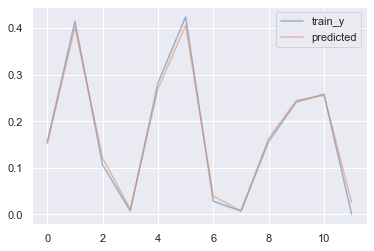

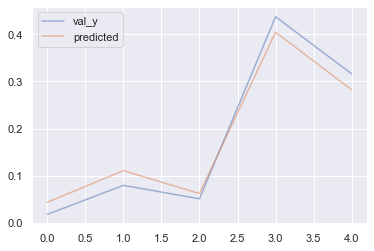

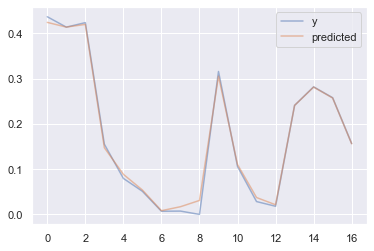

In [4]:
#Random Forest

#prepair data for Model
column_names = ['Ka', 'v0', 'v3', 'vf', 'vr', 'sf', 'ECtopp']
X = mod_dfb[column_names]
y = mod_dfb['Ref_EC']

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 5, random_state=2)
###############

#Random Forest Train

rf_model_train = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
# Fit Model
rf_model_train.fit(train_X, train_y)
rf_train_predict = rf_model_train.predict(train_X)

rf_train_df = pd.DataFrame()
rf_train_df['train_y'] = train_y
rf_train_df['predicted'] = rf_train_predict
rf_train_df.reset_index(drop=True, inplace=True)
rf_train_df[['train_y', 'predicted']].plot(alpha=0.5);
print("rf_Train r^2 is  ",(rf_train_df['train_y'].corr(rf_train_df['predicted']))**2)
print("rf_Train RMSE is  :",((rf_train_df['predicted'] - rf_train_df['train_y']) ** 2).mean() ** .5)




# Make validation predictions and calculate mean absolute error
rf_val_predictions = rf_model_train.predict(val_X)

rf_val_df = pd.DataFrame()
rf_val_df['val_y'] = val_y
rf_val_df['predicted'] = rf_val_predictions
rf_val_df.reset_index(drop=True, inplace=True)
rf_val_df[['val_y', 'predicted']].plot(alpha=0.5);

print("rf_val r^2 is  ",(rf_val_df['val_y'].corr(rf_val_df['predicted']))**2)
print("rf_val RMSE is  :",((rf_val_df['predicted'] - rf_val_df['val_y']) ** 2).mean() ** .5)


#model all for production
rf_model_final = RandomForestRegressor(max_leaf_nodes=100, random_state=1)

rf_model_final.fit(X, y)
rf_final_predict = rf_model_final.predict(X)
rf_final_df = pd.DataFrame()
rf_final_df['y'] = y
rf_final_df['predicted'] = rf_final_predict
rf_final_df.reset_index(drop=True, inplace=True)
rf_final_df[['y', 'predicted']].plot(alpha=0.5);

print("rf_final  r^2 is  ",(rf_final_df['y'].corr(rf_final_df['predicted']))**2)
print("rf_Final RMSE is  :",((rf_final_df['predicted'] - rf_final_df['y']) ** 2).mean() ** .5)




Validation MAE when not specifying max_leaf_nodes: 0
Validation MAE for best value of max_leaf_nodes: 0
Random Forest R Squared:  0.9882226651912062


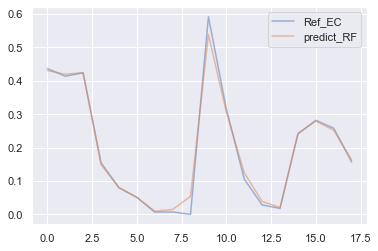

In [15]:
#Random Forest



#prepair data for Model
column_names = ['Ka', 'v0', 'v3', 'vf', 'vr', 'sf', 'ECtopp']
X = mod_dfb[column_names]
y = mod_dfb['Ref_EC']

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 5, random_state=2)



# Specify Model
fct_rf = RandomForestRegressor(random_state=1)
# Fit Model
fct_rf.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = fct_rf.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
fct_rf = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
fct_rf.fit(train_X, train_y)

val_predictions = fct_rf.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

features_rf = ['Ka', 'v0', 'v3', 'vf', 'vr', 'sf',]
Xrf = mod_dfb[features_rf]
yrf = mod_dfb['Ref_EC']


# Specify Model
fct_full_model = RandomForestRegressor(random_state=1)
# Fit Model with all the data
fct_full_model.fit(Xrf, yrf)



mod_dfb['predict_RF'] = fct_full_model.predict(Xrf)
mod_dfb[['Ref_EC', 'predict_RF']].plot(alpha=0.5);


#r_sq_rf = model.score(Xrf, yrf)
#print('Random Forest R Squared: ', r_sq_rf)    
    
#r_sq_lr = r2_score(mod_dfb['Ref_EC'], mod_dfb['predicted'])                                   
#print("Linear Reg R Squared: ", r_sq_lr)    

r_sq_rf = r2_score(mod_dfb['Ref_EC'], mod_dfb['predict_RF'])                                   
print("Random Forest R Squared: ", r_sq_rf)    

https://realpython.com/train-test-split-python-data/
https://medium.com/the-code-monster/split-a-dataset-into-train-and-test-datasets-using-sk-learn-acc7fd1802e0


In [55]:
print((lr_eval_df['val_y'].corr(lr_eval_df['predicted']))**2)

0.7786438116910392


In [ ]:
#Random Forest





